In [1]:
# Sam was here - Feb 28, 2023
# AI Winter School - srahbar.com, info@srahbar.com


<p align="center left">
<img src=https://srahbar.com/wp-content/uploads/2022/09/cropped-Sam-Rahbar-1-copy-2.png width="200" >
</p>

# Objectives:

* Introduction to Regression and its use cases
* Introduction to Decision Trees and Random Forest
* Introduction to Adabost
* Notes on bagging, stacking, boosting techniques
* Handon Examples
* Conclusion & Q/A



# Regression

Machine learning tasks can be gathered into the four following categories:

<p align="center">
<img src=https://miro.medium.com/v2/resize:fit:1400/format:webp/1*vJsXYNlr_GyFc2qrpZGsvA.png width="500" >
</p>

## What is regression?

Regression analysis is defined in Wikipedia as:

---


In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the ‘outcome variable’) and one or more independent variables (often called ‘predictors’, ‘covariates’, or ‘features’).

* The term regression is used when you try to find the relationship between variables.

* In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

The terminology you will often listen related with regression analysis is:

* **Dependent variable or target variable**: Variable to predict.
* **Independent variable or predictor variable**: Variables to estimate the dependent variable.
* **Outlier**: Observation that differs significantly from other observations. It should be avoided since it may hamper the result.
* **Multicollinearity**: Situation in which two or more independent variables are highly linearly related.
* **Homoscedasticity or homogeneity of variance**: Situation in which the error term is the same across all values of the independent variables.


## Common types of regression used:

* Linear Regression
* Polynomial Regression
* Decision Tree Regression
* Random Forest Regression
* AdaBoost Regression


## Building a Linear Regressor

As it was mentioned Regression is the process of estimating the relationship between input data and the continuous-valued output data. This data is usually in the form of real numbers, and our goal is to estimate the underlying function that governs the mapping from the input to the output.

## Ordinary Least Squares
The first method we use is ordinary least squares and the idea behind is to find the best line that fits the data. 
<img src="https://bookdown.org/sbikienga/Intro_to_stat_book/images/chap7/ols.jpg" width="525" height="500">

 

The error function or also called the loss function ( $\epsilon_i$) is the difference between the observed values of y  (y <sub>i </sub>) and the predicted values of y (ŷ<sub>i </sub>). This term is called Residual sum of squares for more information [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

The linear model is written as:

$$y_i = a + bx_i +   \epsilon_i $$

The ordinary least squares (OLS) seeks the coeeficient 'a' and 'b'. The goal is to find values of 𝑎 and 𝑏 that minimize the error. We redefine the error by the next formula

$$\epsilon(a,b)=\sum_{i=1}^n (y_i−ŷ )^2= \sum_{i=1}^n(y_i−(a+bx_i))^2$$

This requires us to find the values of (𝑎, 𝑏) such that the gradient of $\epsilon$ with respect
to our variables (which are 𝑎 and 𝑏) vanishes; thus we require

$$\frac {∂\epsilon}{∂a}=0 $$     
$$\frac {∂\epsilon}{∂b}=0$$

Differentiating $\epsilon(𝑎, 𝑏)$ yields:

$$\frac {∂\epsilon}{∂a}= 2\sum_{i=1}^n (y_i-a-bx_i)(-1)$$ 
$$\frac {∂\epsilon}{∂b}= 2\sum_{i=1}^n (y_i-a-bx_i)(-x_i)$$ 


To solve this equations remember to use:
$$ \bar{X} =\sum_{i=1}^n \frac{1}{n} x_i $$


So we will end up with the following coefficients:

$$a=\bar{y}−b\bar{x}$$

$$b=\frac {\sum_{i=1}^n (x_i−\bar{x})(y_i−\bar{y})}{\sum_{i=1}^n(x_i−\bar{x})^2} $$

**RMSE**  --> **Root Mean Square Error**

It indicates how close the observed data points are to the model's predicted values. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and is the most important criterion for fit if the main purpose of the model is prediction.



**The main advantages of using Least Squares are:**

*   Applicability: There are hardly any applications where least squares doesn’t work
*   Calculations are very fast
*   Has no paramaters to tune
*   Elemento de lista




**Disadvantages:**
 - Sensitivity to outliers
 - Tendency to overfit data. If we have many features the learned hyphotesis may fit the training set very well but fail to generalize to new examples


**Linear Regression**
Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.

<p align="center">
<img src=https://www.andreaperlato.com/MLPost/2019-03-27-polynomial-regression-smoothing-splines_files/figure-html/unnamed-chunk-2-1.png width="500" >




Lets play with some examples:




In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
* **𝑦=𝑎𝑥+𝑏 **
where  𝑎  is commonly known as the slope, and  𝑏  is commonly known as the intercept.
Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

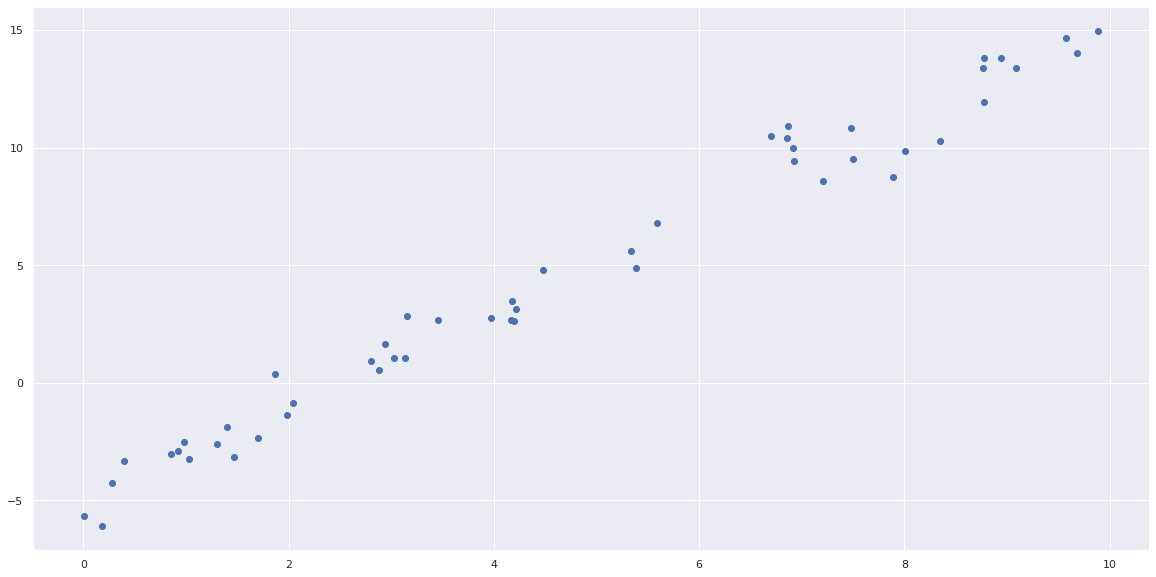

In [34]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.figure(figsize=(20, 10))
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and 

---

construct the best-fit line:

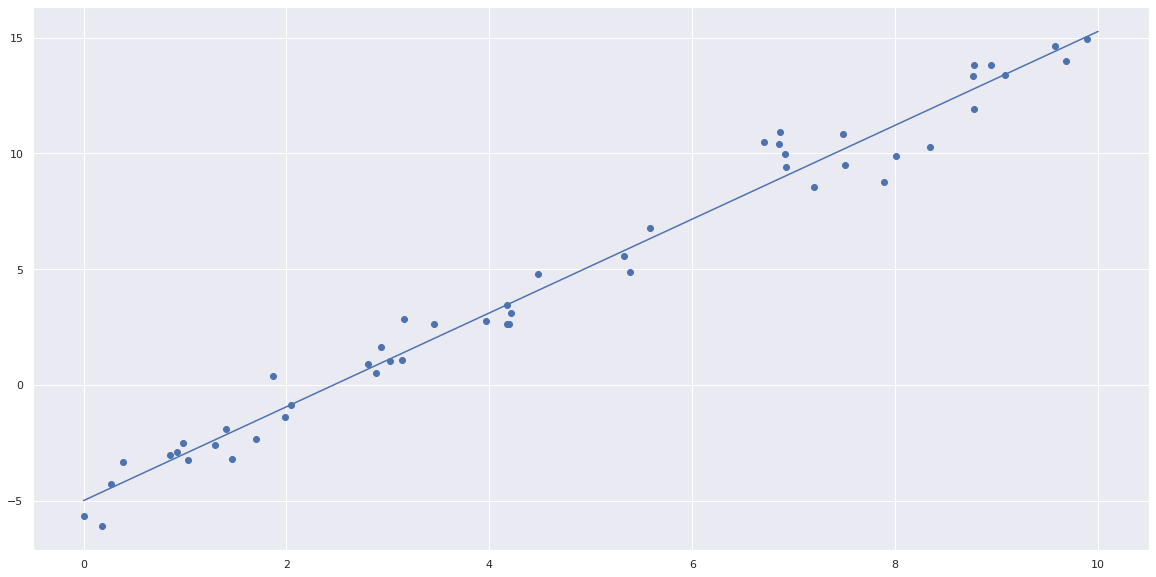

In [46]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [36]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


# Let's Looks at another famous dataset and see some more of Regression's application

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


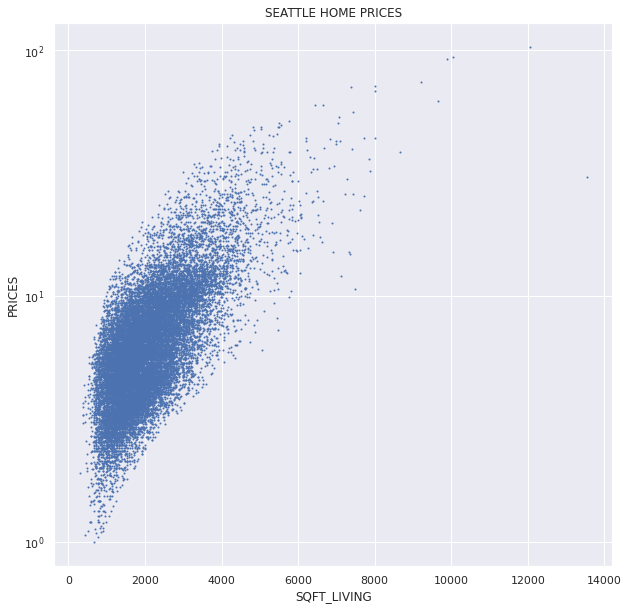

In [37]:
dataset_link = '/content/kc_house_data.csv'
houses_df = pd.read_csv(dataset_link)

minimum_y = houses_df['price'].min()
# s refers to size
#alpha --> 0.0 transparent through 1.0 opaque
plt.figure(figsize=(10,10))
plt.scatter(x = houses_df.sqft_living,y = houses_df.price/minimum_y,s = 1, alpha = 1)
plt.xlabel("SQFT_LIVING")
plt.ylabel("PRICES")
plt.title("SEATTLE HOME PRICES")
plt.yscale('log')

#Lets see what we have in the dataset
houses_df.head()

##### We use a log scale as it allows a large range of elements to be displayed without small values being compressed down into bottom of the graph


In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #supress scientific notation
houses_df.describe().iloc[:,1:].drop(['yr_built','yr_renovated','zipcode'],axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000,21613.000
mean,540088.142,3.371,2.115,2079.900,15106.968,1.494,0.008,0.234,3.409,7.657,1788.391,291.509,47.560,-122.214,1986.552,12768.456
std,367127.196,0.930,0.770,918.441,41420.512,0.540,0.087,0.766,0.651,1.175,828.091,442.575,0.139,0.141,685.391,27304.180
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,47.156,-122.519,399.000,651.000
25%,321950.000,3.000,1.750,1427.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,47.572,-122.230,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10688.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,47.778,-121.315,6210.000,871200.000


In [24]:
correlation = houses_df.iloc[:,2:].corr(method='pearson')
correlation.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.31,0.53,0.7,0.09,0.26,0.27,0.4,0.036,0.67,0.61,0.32,0.054,0.13,-0.053,0.31,0.022,0.59,0.082
bedrooms,0.31,1.0,0.52,0.58,0.032,0.18,-0.0066,0.08,0.028,0.36,0.48,0.3,0.15,0.019,-0.15,-0.0089,0.13,0.39,0.029
bathrooms,0.53,0.52,1.0,0.75,0.088,0.5,0.064,0.19,-0.12,0.66,0.69,0.28,0.51,0.051,-0.2,0.025,0.22,0.57,0.087
sqft_living,0.7,0.58,0.75,1.0,0.17,0.35,0.1,0.28,-0.059,0.76,0.88,0.44,0.32,0.055,-0.2,0.053,0.24,0.76,0.18
sqft_lot,0.09,0.032,0.088,0.17,1.0,-0.0052,0.022,0.075,-0.009,0.11,0.18,0.015,0.053,0.0076,-0.13,-0.086,0.23,0.14,0.72
floors,0.26,0.18,0.5,0.35,-0.0052,1.0,0.024,0.029,-0.26,0.46,0.52,-0.25,0.49,0.0063,-0.059,0.05,0.13,0.28,-0.011
waterfront,0.27,-0.0066,0.064,0.1,0.022,0.024,1.0,0.4,0.017,0.083,0.072,0.081,-0.026,0.093,0.03,-0.014,-0.042,0.086,0.031
view,0.4,0.08,0.19,0.28,0.075,0.029,0.4,1.0,0.046,0.25,0.17,0.28,-0.053,0.1,0.085,0.0062,-0.078,0.28,0.073
condition,0.036,0.028,-0.12,-0.059,-0.009,-0.26,0.017,0.046,1.0,-0.14,-0.16,0.17,-0.36,-0.061,0.003,-0.015,-0.11,-0.093,-0.0034
grade,0.67,0.36,0.66,0.76,0.11,0.46,0.083,0.25,-0.14,1.0,0.76,0.17,0.45,0.014,-0.18,0.11,0.2,0.71,0.12


## Some data visualizations before fitting a model

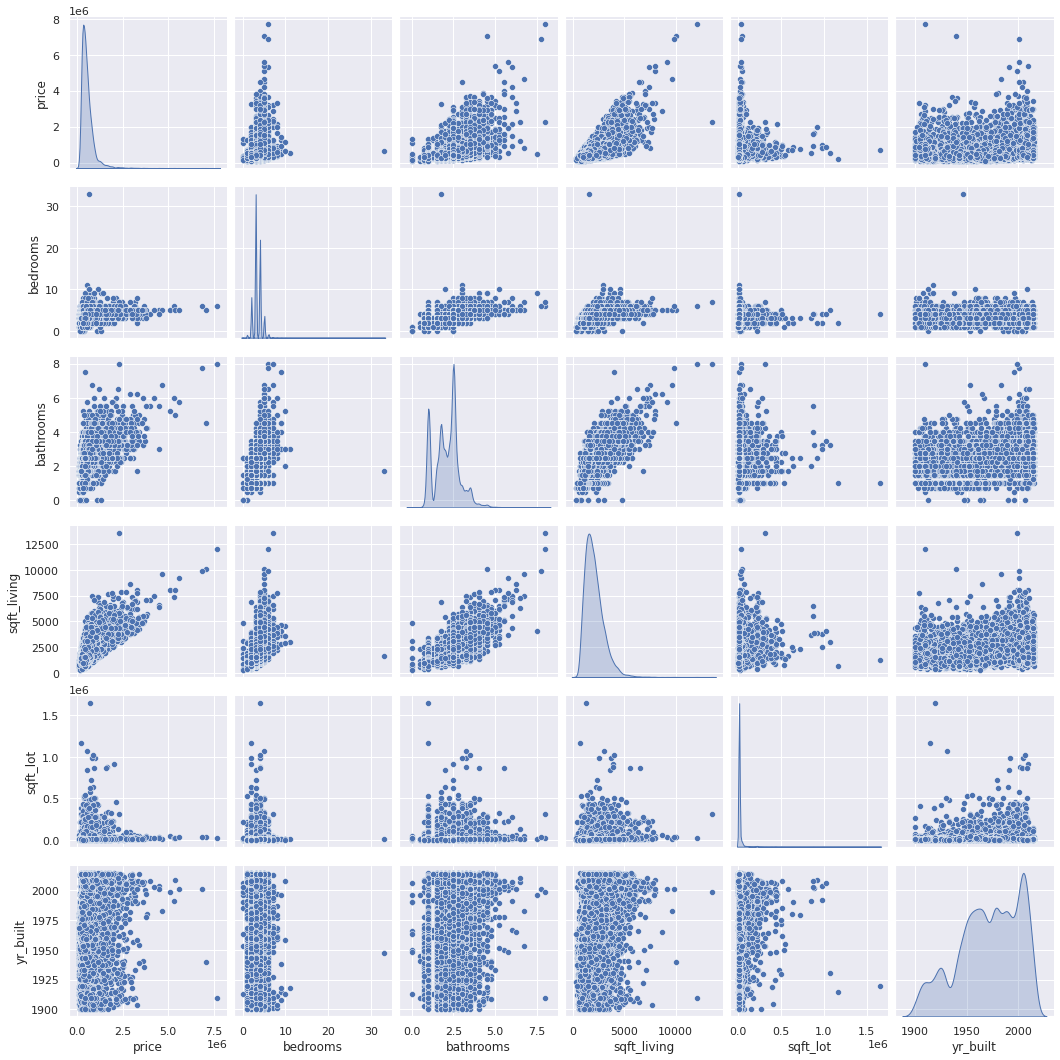

<Figure size 1800x1440 with 0 Axes>

In [39]:
sns.set(style = "ticks", color_codes=True)
correlation_features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','yr_built']
sns.set_style("darkgrid")
sns.pairplot(houses_df[correlation_features],diag_kind="kde",dropna=True)
#diag_kind:Use kernel density estimates for univariate plots:
#kind:Fit linear regression models to the scatter plots
plt.figure(figsize=(25,20))
plt.show();

In [41]:
### Lets divide the dataset into training and test
dataset_train, dataset_test, price_train, price_test = train_test_split(houses_df,houses_df['price'],test_size=0.2,random_state=3)


Ordinary Least Squares
Coefficient: 282.24681519844125
Intercept -47235.81130290113
RSS 279538024252709.97
RMSE 254289.1486936708
The model's performance is 0.50



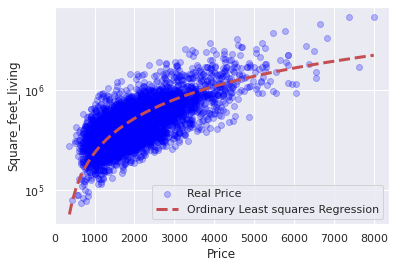

<Figure size 1080x720 with 0 Axes>

In [44]:
#Build the regression model using only sqft_living as a feature
# Create linear regression object
regression_ols = LinearRegression()
#We convert the column sqft_living to a numpy array to make it easier to work
living_train = np.asarray(dataset_train.sqft_living)
living_train = living_train.reshape(-1,1)
#Train the model using the training sets
#Here price is the "target" data in this model, the other features are the independet variables
ols_model = regression_ols.fit(living_train, price_train)
living_test = np.asarray(dataset_test.sqft_living)
living_test = living_test.reshape(-1,1)
#We the trained dataset we make a prediction for the test dataset
prediction_test_ols = ols_model.predict(living_test)

print ('Ordinary Least Squares')
#Coefficient
print('Coefficient:',ols_model.coef_[0])
print ('Intercept', ols_model.intercept_)
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((price_test - prediction_test_ols) **2).sum())
# Calculate the RMSE ( Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(price_test,prediction_test_ols)))
#The model's performance on test set is:
print('The model\'s performance is %.2f\n'% ols_model.score(living_test, price_test))



living_test_sort = np.sort(living_test.reshape(-1))
plt.scatter(living_test, price_test, color='blue', alpha=0.25,label='Real Price')
#When you plot you have to sort the array, in this case square feet living , the one that belongs to the test, if you dont do this, the plot looks weird
plt.plot(living_test_sort, ols_model.predict(living_test_sort.reshape(-1,1)),'r--',linewidth=3, label='Ordinary Least squares Regression')


plt.xlabel('Price')
plt.ylabel('Square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))





#Blue dots are from the original data the red line is the prediction from the least squares 


plt.show()

In [45]:
actual_predicted_data_ols = pd.DataFrame({'Actual': price_test, 'Predicted': np.round(prediction_test_ols,decimals=3)})
actual_predicted_data_ols.head()


,Actual,Predicted
4131,525000.000,404359.093
17459,1870000.000,1225697.325
2192,750000.000,853131.529
12418,244900.000,127757.214
15773,275000.000,356377.134


## Lasso Regression


It's a shrinkage and variable selection method. LASSO is an acronym form Least Absolute selection and Shrinkage Operator. The Lasso imposes a constraint on the sum of the absolute values of the model parameters where the sum has a specified constant as an upper bound. This constraint causes regression coefficients for some variables to shrink towards zero. The shrinkage process identifies the variables most strongly associated with the response variable. The goal is to obtain the subset of predictors that minimized the prediction error. You should use this method when you hove more than two feautures at least.

$$ Y= \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + b $$

$ \beta_1 , \beta_2 , \beta_3 $ are coefficients of regression  


$ X_1, X_2, X_3$ are features 

The Lasso method uses $L_1$ regularization. What is that? It's a way of avoiding overfitting. 

$$\|X\|_1 = \sum_{i=1}^n|x_i|  $$

$L_1$ norm is the sum of the absolute value of the coefficients.

The cost function in Lasso is the next formula:


$$ \epsilon = Error + Penalty$$

$$ \epsilon(a,b)=\sum_{i=1}^n (y_i−ŷ )^2 + \lambda\sum_{j=1}^p |\beta_j| $$


 $$ \epsilon(a,b)=\sum_{i=1}^n(y_i−(\sum_{j=1}^p x_{ij}\beta_j))^2 +\lambda\sum_{j=1}^p|\beta_j| $$
 
###Tuning paramater $\lambda $:
It is to control the strenght of the penalty. 

*   $\lambda$ increases more coefficients are reduced to zero
*   $\lambda$ is zero then it's OLS Regression.
*   $\lambda \rightarrow \infty$ : we get $\beta=0$ all coefficients are eliminated
*   $\lambda$ increases, bias increases.
*  $\lambda$ decreases, variance increases


The **bias** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).The **variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting). For more information learn about the  [Bias and Variance Tradeoff](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)




**Advantages**
- Greater prediction accuracy 
- Increase model interpretability. Reduce variance without a substantial increase in bias.
- The regression coefficients for unimportant variables are reduced to zero and produces a simple model that selects only the most important predictors.


**Disadvantages**
 
* If coefficientes are correlated , Lasso arbitrarily chooses only  one of them.
* Estimating p-values is not very straightforward


Lasso Regression
Intercept -47235.811055829516
Coefficient: 282.2468150797249
RSS 279538024245681.88
RMSE 254289.1486904742
The model's performance is 0.50



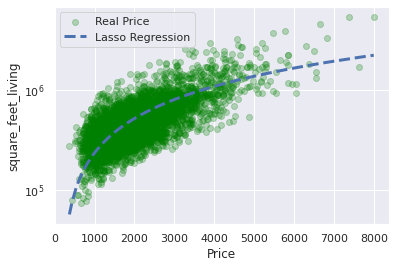

<Figure size 1080x720 with 0 Axes>

In [47]:
regression_lasso = Lasso(alpha=.1)
lasso_model = regression_lasso.fit(living_train, price_train)
prediction_test_lasso = lasso_model.predict(living_test)

print ('Lasso Regression')
#Intercept
print ('Intercept', lasso_model.intercept_)
# Coefficient
print('Coefficient:', lasso_model.coef_[0])
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((price_test - prediction_test_lasso) **2).sum())
# Calculate the RMSE (Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(price_test,prediction_test_lasso)))
# Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % lasso_model.score(living_test, price_test))
# Plot 
plt.scatter(living_test, price_test, color='green', alpha=0.25,label='Real Price')
plt.plot(living_test_sort, lasso_model.predict(living_test_sort.reshape(-1,1)),'b--',linewidth=3, label='Lasso Regression')
plt.xlabel('Price')
plt.ylabel('square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))

plt.show()

## Ridge Regression

Aims to avoid overfitting adding a cost to the RSS term of OLS. A tuning parameter $\lambda$ controls the strength of the penalty.The $\lambda$ parameter is a scalar that should be learned  using cross validation. The penalty uses the $L_2$ (euclidean lenght) of the coefficient vector 

The Rdidge method uses $L_2$ regularization. What is that? It's a way of avoiding overfitting. 

$$\|X\|_2 =\sum_{i=1}^n|x_i|^2$$

$L_2$ norm is the sum of the squared value of the coefficients.

The cost function in Ridge is the next formula:


$$ \epsilon = Error + Penalty$$

$$ \epsilon(a,b)=\sum_{i=1}^n (y_i−ŷ )^2 + \lambda\sum_{j=1}^p |\beta_j|^2 $$


 $$ \epsilon(a,b)=\sum_{i=1}^n(y_i−( \sum_{j=1}^p x_{ij}\beta_j))^2 +\lambda\sum_{j=1}^p|\beta_j| ^2$$

**Tuning parameter $\lambda$**
  - When λ = 0, we get the linear regression estimate
  - When $\lambda\rightarrow \infty$,we get $ \beta_{j} =0$
  - For $\lambda$  in between, we are balancing two ideas: fitting a linear model of y on X, and shrinking the coefficients

As Lasso regression $ \rightarrow$ The bias increases as  $\lambda$ (amount of shrinkage) increases. And the variance decreases as $\lambda$ increases
The amount of shrinkage is controlled by $\lambda$, the tuning parameter that multiplies the ridge penalty. Large λ means more shrinkage, and so we get different coefficient estimates for different values of λ. Choosing an appropriate value of λ is important, and also difficult.


**Advantages**
   - Ridge regression performs particularly well when there is a subset of true coefficients that are small or even zero. 
   - Sparsity (Doesn't produce sparse results i.e. it does not shrink coefficients all the way to zero)
   
   
 ** Disadvantages** 
 
   - It doesn’t do as well when all of the true coefficients are moderately large


Ridge Regression
Intercept -47235.81129886792
Coefficient: 282.24681519650335
RSS 279538024252595.22
RMSE 254289.14869361863
The model's performance is 0.50



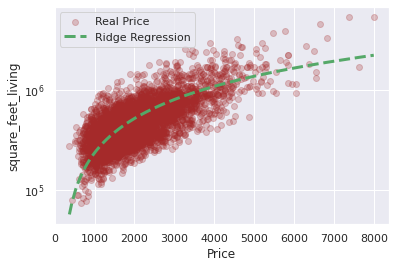

<Figure size 1080x720 with 0 Axes>

In [51]:
regression_ridge = Ridge(alpha=0.1)
ridge_model = regression_ridge.fit(living_train, price_train)
prediction_test_ridge = ridge_model.predict(living_test)

print ('Ridge Regression')
#Intercept
print ('Intercept', ridge_model.intercept_)
# Coeficient
print('Coefficient:', ridge_model.coef_[0])
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((price_test - prediction_test_ridge) **2).sum())
# Calculate the RMSE (Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(price_test,prediction_test_ridge)))
# Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % ridge_model.score(living_test, price_test))
# Plot 
plt.scatter(living_test, price_test, color='brown', alpha=0.25,label='Real Price')
plt.plot(living_test_sort, ridge_model.predict(living_test_sort.reshape(-1,1)),'g--',linewidth=3, label='Ridge Regression')
plt.xlabel('Price')
plt.ylabel('square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))

plt.show()

In [52]:
actual_predicted_data_ridge = pd.DataFrame({'Actual': price_test, 'Predicted': np.round(prediction_test_ridge,decimals=3)})
actual_predicted_data_ridge.head()

,Actual,Predicted
4131,525000.000,404359.093
17459,1870000.000,1225697.325
2192,750000.000,853131.529
12418,244900.000,127757.214
15773,275000.000,356377.134


## Random Forest Regression


## Decision Trees:

<p align="center">
<img src=https://exploringaiblog.files.wordpress.com/2019/02/dt.png width="500" >
</p>

Imagine you are out trying to buy tomatoes. You go to a store, and in front of you there are a bunch of tomatoes. Tomatoes in a variety of shapes and sizes and colors, ranging from small and round, to big and oblong, from cherry red to unripe green. How do you decide which tomato is the tastiest? Well you know from experience what the best tomatoes look, feel and smell like. You know what qualities are the most important when judging a tomato for it’s tastiness, and based on those qualities you make a decision. Your decision process might look like this:


<p align="center">
<img src=https://exploringaiblog.files.wordpress.com/2019/02/image.png width="500" >
</p>


This process is similar to the way Decision Trees work when they are trying to solve classification problems.



Decision trees are a useful ML algorithm, because unlike other solutions, like Neural Networks, they are not just a black box. What this means is that decision can trees not only solve a problem, but show you the reasoning behind the decision process. Neural Networks act as a black box, we can control the inputs to it and modify it to get the desired outputs, but we do not know how the Neural Network is solving that problem.

## How do decision trees work?

A decision tree is a flowchart-like tree structure where 
* an internal node represents a feature(or attribute), 
* the branch represents a decision rule, and 
* each leaf node represents the outcome.

<p align="center">
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png width="700" >
</p>


### The basic idea behind any decision tree algorithm is as follows:

1- Select the best attribute using Attribute Selection Measures (ASM) to split the records.

2- Make that attribute a decision node and breaks the dataset into smaller subsets.

3- Start tree building by repeating this process recursively for each child until one of the conditions will match:
* There are no more remaining attributes.
* There are no more instances.

## Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partitions data in the best possible manner. 

* It is also known as splitting rules because it helps us to determine breakpoints for tuples on a given node.

* ASM provides a rank to each feature (or attribute) by explaining the given dataset. 

* The best score attribute will be selected as a splitting attribute (Source). In the case of a continuous-valued attribute, split points for branches also need to define. 

* The most popular selection measures are **Information Gain**, **Gain Ratio**, and **Gini Index**.

Information Gain:
* Decrease the randomness (entropy) and increase the certainty
* Features that can further decrease the randomness and get us into more certain answeres to explain the outcome  -> leaf nodes
* Information gain is biased for the attribute with many outcomes. (Usually distinct) -> e.g. customer_id


Gain Ratio:

* Gain ratio handles the issue of bias by normalizing the information gain using Split Info. 

Gini Index:
* The attribute with the minimum Gini index is chosen as the splitting attribute.
* A weighted sum of the impurity of each partition

## Regression Trees | Decision Tree for Regression 

* A regression tree is basically a decision tree that is used for the task of regression which can be used to predict continuous valued outputs instead of discrete outputs.


<p align="center">
<img src=https://miro.medium.com/v2/resize:fit:1400/format:webp/1*v4KK_UlEsxLuIWpgp1dxpg.png width="600" >
</p>


Mean Square Error
In Decision Trees for Classification, we saw how the tree asks right questions at the right node in order to give accurate and efficient classifications. The way this is done in Classification Trees is by using 2 measures , namely Entropy and Information Gain. But since we are predicting continuous variables, we cannot calculate the entropy and go through the same process. We need a different measure now. A measure that tells us how much our predictions deviate from the original target and that’s the entry-point of mean square error.


<p align="center">
<img src=https://miro.medium.com/v2/resize:fit:728/format:webp/1*WZysd8kAnlTU_Ec1mxNgJA.png width="200" >
</p>



Y is the actual value and Y_hat is the prediction , we only care about how much the prediction varies from the target. Not in which direction. So, we square the difference and divide the entire sum by the total number of records.
**In the Regression Tree algorithm, we do the same thing as the Classification trees. But, we try to reduce the Mean Square Error at each child rather than the entropy.**


In [17]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])
  
# print the dataset
print(dataset) 


[['Asset Flip' '100' '1000']
 ['Text Based' '500' '3000']
 ['Visual Novel' '1500' '5000']
 ['2D Pixel Art' '3500' '8000']
 ['2D Vector Art' '5000' '6500']
 ['Strategy' '6000' '7000']
 ['First Person Shooter' '8000' '15000']
 ['Simulator' '9500' '20000']
 ['Racing' '12000' '21000']
 ['RPG' '14000' '25000']
 ['Sandbox' '15500' '27000']
 ['Open-World' '16500' '30000']
 ['MMOFPS' '25000' '52000']
 ['MMORPG' '30000' '80000']]


In [18]:

# select all rows by : and column 1
# by 1:2 representing features
X = dataset[:, 1:2].astype(int) 
  
# print X
print(X)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [19]:
y = dataset[:, 2].astype(int) 
  
# print y
print(y)

[ 1000  3000  5000  8000  6500  7000 15000 20000 21000 25000 27000 30000
 52000 80000]


In [20]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [21]:
y_pred = regressor.predict([[3750]])
  
# print the predicted price
print("Predicted price: % d\n"% y_pred) 

Predicted price:  8000



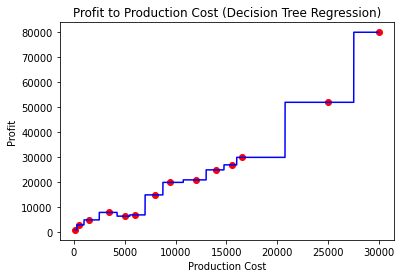

In [7]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X), max(X), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')

# show the plot
plt.show()

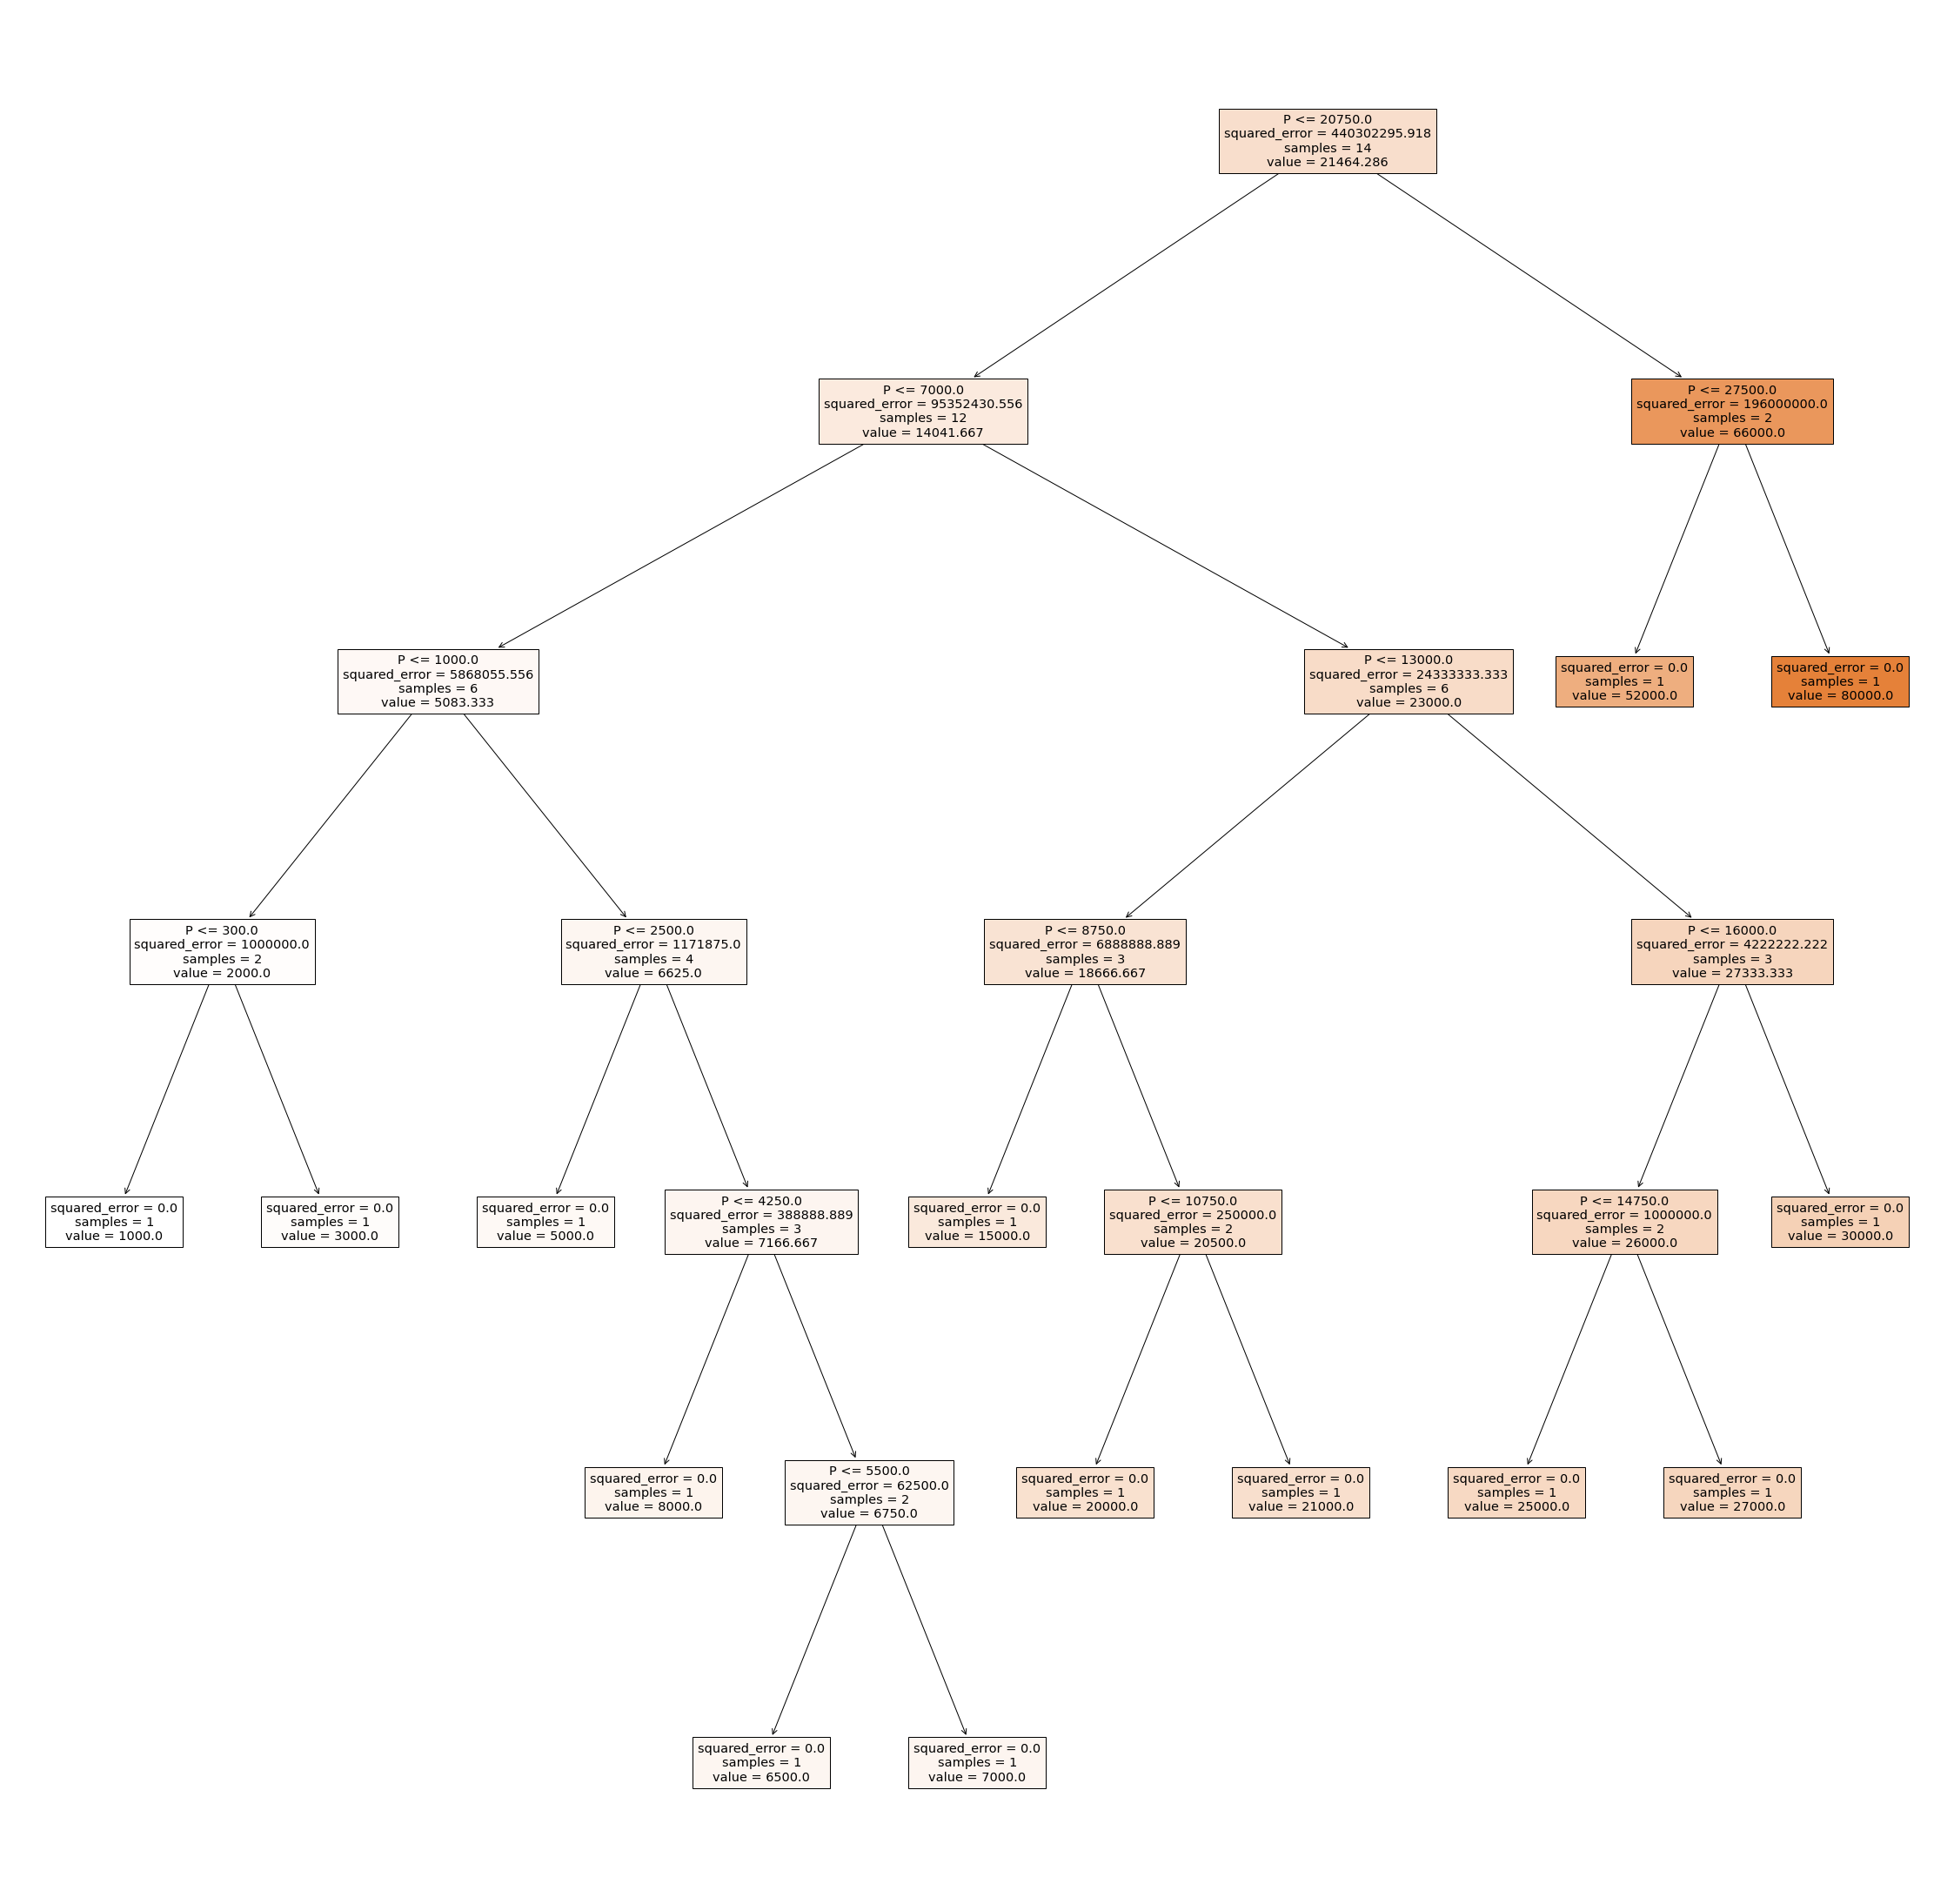

In [8]:
# import export_graphviz
from sklearn.tree import export_graphviz 
from IPython.display import Image
import graphviz
from sklearn import tree

  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['Production Cost']) 

plt.figure(figsize=(40, 40))

tree.plot_tree(regressor,
           feature_names ='Prod', 
           class_names='Prof',
           filled = True);

* algorithm is prone to overfitting. So, It is better to always specify the minimum number of children per leaf node in advance and use cross-validation to find this Value.

## Types Of Ensemble Methods

Ensemble Methods can be used for various reasons, mainly to:

* Decrease Variance (Bagging)
* Decrease Bias (Boosting)
* Improve Predictions (Stacking)

# Random Forest Regression


Random Forest Regression algorithms are a class of Machine Learning algorithms that use 

* the combination of multiple random decision trees each trained on a subset of data. 
* The use of multiple trees gives stability to the algorithm and reduces variance. The random forest regression algorithm is a commonly used model due to its ability to work well for large and most kinds of data.



<p align="center">
<img src=https://www.theclickreader.com/wp-content/uploads/2021/08/Random-Forest-Regression.png width="800" >
</p>


The algorithm creates each tree from a different sample of input data. At each node, a different sample of features is selected for splitting and the trees run in parallel without any interaction. The predictions from each of the trees are then averaged to produce a single result which is the prediction of the Random Forest.

In [9]:
import numpy as np 
import pandas as pd 
import requests, io 
import matplotlib.pyplot as plt 
# scikit-learn modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor

The dataset consists of data related to petrol consumptions (in millions of gallons) for 48 US states. This value is based upon several features such as the petrol tax (in cents), Average income (dollars), paved highways (in miles), and the proportion of the population with a driver’s license. We will be loading the data set using the read_csv() function from the pandas module and store it as a pandas DataFrame object.

In [10]:
url = "https://drive.google.com/u/0/uc?id=1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_&export=download"
data = requests.get(url).content
# Reading the data
dataset = pd.read_csv(io.StringIO(data.decode('utf-8')))
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
x = dataset.drop('Petrol_Consumption', axis = 1) # Features
y = dataset['Petrol_Consumption']  # label

In [12]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [13]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(max_depth= 4,n_estimators = 10, random_state = 0)
# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

RandomForestRegressor(max_depth=4, n_estimators=10, random_state=0)

In [14]:
y_pred = model.predict(x_test)
# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  95.877


* As we can see, the value of error metric has decreased significantly and this model performed quite well than the single decision tree regression model that we studied in the previous lesson.


In [60]:
y_pred = model.predict(x_test)

In [61]:
y_pred

array([572.1, 570.7, 476.1, 507.8, 509.2, 613. , 441.4, 588.8, 593.2,
       704.2])

## Random Forest on the House Prices

RSS 256714183150428.8
RMSE 243686.97339356988
The model's performance is 0.54



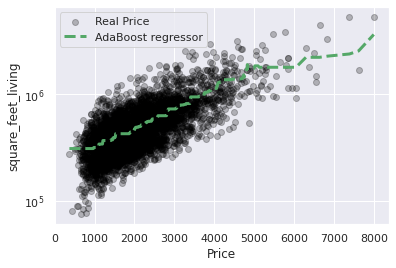

<Figure size 1080x720 with 0 Axes>

In [57]:
#n_estimators: It controls the number of weak learners.
#learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
#base_estimators: It helps to specify different ML algorithm. By default sklearn uses decision tree
rf_regressor = RandomForestRegressor(max_depth= 4,n_estimators = 10, random_state = 0)
rf_model = rf_regressor.fit(living_train, price_train)
prediction_test_ada = rf_model.predict(living_test)
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((price_test - prediction_test_ada) **2).sum())
# Calculate the RMSE (Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(price_test,prediction_test_ada)))
#Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % rf_model.score(living_test, price_test))
# Plot 
plt.scatter(living_test, price_test, color='black', alpha=0.25,label='Real Price')
plt.plot(living_test_sort, rf_model.predict(living_test_sort.reshape(-1,1)),'g--',linewidth=3, label='AdaBoost regressor')
plt.xlabel('Price')
plt.ylabel('square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))

plt.show()

# What Is the AdaBoost Algorithm?

AdaBoost stands for Adaptive Boosting. When we mention boosting we refer to  aggregate a set of weak classifiers into a strong classifier.  It is adaptive in the sense that classifiers that come in next for execution are adjusted according to those instances that were wrongly classified width the previous classifiers. You could say that by just focusing on the training data samples misclassified by the previous weak classifier, each weak classifier contributes its bit the best it can  to improve the overall classification rate.  AdaBoost calls the weak classifiers repeatedly, performing a series of  $t = 1,...,T$  classifiers. In each execution, "weight" calculated by incorrectly classified examples increases (or, alternatively, weights of each correctly classified examples decreases). New classifiers are constrained to focus on those examples that were incorrectly classified by previous classifiers. 

### Disadvantages

- It is sensitive to noisy data and information that doesn't belong to the required set


### Advantagess

- in some situations, this algorithm may be less susceptible to memory input set in comparison to many other algorithms

### Basic Idea 

1- Take lots of (possibly) weak predictors

2- Weight them and add them up

3- Get a stronger predictor



**First** : Initialize the weight of each observation to $W_i =\frac { 1}{N} .$ For $ t $ in 1 to T do the following.

1- Using the weights, learn model $h_t(x_i) : X \rightarrow [0,1] $

2- Compute $ \epsilon =\sum_{i=1}^{n} w_i^t | y_i −h_t (x_i )|  $ as the error for $h_t$

3- Let $ \beta_{t} = \frac{\epsilon_{t}}{1 - \epsilon_{t}} $ and update the weights  of each of the observations  as $ w_i ^{(t+1)} = w_i^{(t)}\beta_{t}^{1-|y_i -h_t(x_i)|}  $ This scheme increases the weights of observations poorly  predicted by $h_t$ 

4- Normalize $ w^{t+1} $ so that they sum to one


* The most common estimator used with AdaBoost is decision trees with one level which means Decision trees with only 1 split. These trees are also called Decision Stumps.

<p align="center">
<img src=https://editor.analyticsvidhya.com/uploads/120932.png width="300" >
</p>


What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points with higher weights are given more importance in the next model. It will keep training models until and unless a lower error is received.


<p align="center">
<img src=https://editor.analyticsvidhya.com/uploads/159381.png width="600" >
</p>


In [54]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [55]:
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=0.1)

In [69]:
print(RegModel)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.1)


In [72]:
#Creating the model on Training Data
AB=RegModel.fit(x_train,y_train)
prediction=AB.predict(x_test)
print(prediction)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[520.09090909 532.22857143 511.59090909 558.93939394 523.66666667
 533.5        508.87878788 568.77419355 532.29032258 651.68421053]


In [71]:
# Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AB.predict(x_train)))

#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))


R2 Value: 0.5407055146522639
Accuracy 87.33098212119467


## Adaboost on the housing prices:

RSS 264496601352933.75
RMSE 247353.14134487804
The model's performance is 0.52



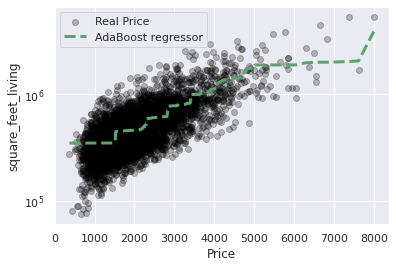

<Figure size 1080x720 with 0 Axes>

In [56]:

#n_estimators: It controls the number of weak learners.
#learning_rate:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
#base_estimators: It helps to specify different ML algorithm. By default sklearn uses decision tree
adaboost_regressor = AdaBoostRegressor(n_estimators=1500, learning_rate = 0.001, loss='exponential')
ada_model = adaboost_regressor.fit(living_train, price_train)
prediction_test_ada = ada_model.predict(living_test)
# Apply the model we created using the training data to the test data, and calculate the RSS.
print('RSS',((price_test - prediction_test_ada) **2).sum())
# Calculate the RMSE (Root Mean Squared Error)
print('RMSE', np.sqrt(metrics.mean_squared_error(price_test,prediction_test_ada)))
#Coefficient of determination R^2 of the prediction
print('The model\'s performance is %.2f\n' % ada_model.score(living_test, price_test))
# Plot 
plt.scatter(living_test, price_test, color='black', alpha=0.25,label='Real Price')
plt.plot(living_test_sort, ada_model.predict(living_test_sort.reshape(-1,1)),'g--',linewidth=3, label='AdaBoost regressor')
plt.xlabel('Price')
plt.ylabel('square_feet_living')
plt.legend()
plt.yscale('log')
plt.figure(figsize=(15,10))

plt.show()

## Summary:

* Regression -> continuous values
* Different types of regression
* Ensemble Methods can be used for various reasons, mainly to:
 - Decrease Variance (Bagging) -> random forest
- Decrease Bias (Boosting) -> adaboost
- Improve Predictions (Stacking) random forest + adaboost

## Assignments:
* Create more modular functions/classes for python scripts
* Add more featured for the regression prediction on the house prices and compare the results and performance improvement
  - Random Forest
  - AdaBoost